# Libraries Importing

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display,HTML
from scipy.stats import chi2_contingency
import re
from sklearn.preprocessing import RobustScaler,MinMaxScaler
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score,f1_score, accuracy_score,recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Dataset Importing

In [2]:
df = pd.read_excel('DATA/DATA.xlsx')

df.head()

,RNBR,PROVIDER,GROUP ID,EFFECTIVE DATE,EXPIRY DATE,CONTTYPE,CONTRACT,EXTERNAL#,BRANCH,BROKER,...,SERVICE,DESCRIPTION.2,ITEM,DESCRIPTION.3,DOCTOR FEES CLAIMED AMOUNT,DOCTOR FEES APPROVED AMOUNT,CLAIM RECEIVED DATE,PROVIDER INV NO,POLICY EXCESS APPLICABLE,CO-INSURANCE
0,137,C3013,880.0,20/11/2017,19/11/2018,GROUP,8014116,HP/01/1801/,MAIN BRANCH,1,...,LSP,LUMP SUM PROCEDURES,30520,"Septoplasty or submucous resection, with or wi...",0,0,19/04/2018,253157,0.0,0
1,137,C3013,880.0,20/11/2017,19/11/2018,GROUP,8014116,HP/01/1801/,MAIN BRANCH,1,...,LSP,LUMP SUM PROCEDURES,31276,"Nasal/sinus endoscopy, surgical with frontal s...",0,0,19/04/2018,253157,0.0,0
2,137,C3013,880.0,20/11/2017,19/11/2018,GROUP,8014116,HP/01/1801/,MAIN BRANCH,1,...,PH,PHARMACY,NaN,NaN,0,0,19/04/2018,253157,0.0,0
3,137,C3013,880.0,20/11/2017,19/11/2018,GROUP,8014116,HP/01/1801/,MAIN BRANCH,1,...,SG,SURGERY,NaN,NaN,0,0,19/04/2018,253157,0.0,0
4,137,C3013,880.0,20/11/2017,19/11/2018,GROUP,8014116,HP/01/1801/,MAIN BRANCH,1,...,LSP,LUMP SUM PROCEDURES,30802,"Cautery and/or ablation, mucosa of inferior tu...",0,0,19/04/2018,253157,0.0,0


# Dropping Duplicates

In [3]:
df.loc[df.duplicated(keep=False).values]

,RNBR,PROVIDER,GROUP ID,EFFECTIVE DATE,EXPIRY DATE,CONTTYPE,CONTRACT,EXTERNAL#,BRANCH,BROKER,...,SERVICE,DESCRIPTION.2,ITEM,DESCRIPTION.3,DOCTOR FEES CLAIMED AMOUNT,DOCTOR FEES APPROVED AMOUNT,CLAIM RECEIVED DATE,PROVIDER INV NO,POLICY EXCESS APPLICABLE,CO-INSURANCE
187,137,C3007,1031.0,15/08/2017,31/12/2018,GROUP,8013523,200/2017/016,MAIN BRANCH,1,...,LSP,LUMP SUM PROCEDURES,52282,"Cystourethroscopy, with insertion of urethral ...",0,0,2018-11-07 00:00:00,IP05/238,0.00,0
188,137,C3007,1031.0,15/08/2017,31/12/2018,GROUP,8013523,200/2017/016,MAIN BRANCH,1,...,LSP,LUMP SUM PROCEDURES,52282,"Cystourethroscopy, with insertion of urethral ...",0,0,2018-11-07 00:00:00,IP05/238,0.00,0
274,137,C3014,1031.0,15/08/2017,31/12/2018,GROUP,8013523,200/2017/016,MAIN BRANCH,1,...,LB,LABORATORY,87205,Urine gram stain,0,0,27/07/2018,5552871,1.05,0
278,137,C3014,1031.0,15/08/2017,31/12/2018,GROUP,8013523,200/2017/016,MAIN BRANCH,1,...,LB,LABORATORY,87205,Urine gram stain,0,0,27/07/2018,5552871,1.05,0
306,137,C3012,886.0,2017-01-11 00:00:00,31/10/2018,GROUP,8014027,200/17/021,MAIN BRANCH,1,...,LB,LABORATORY,82962,"Glucose, blood by glucose monitoring device(s)...",0,0,23/07/2018,105410,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19523,137,C3049,996.0,19/05/2018,18/05/2019,GROUP,8015261,HP 01/1801/200,MAIN BRANCH,1,...,INJ,INJECTIONS & INFUSIONS,96372,Injection IM with the medicine cost,0,0,2019-07-01 00:00:00,S144026//S144021,0.30,0
19524,137,C3049,996.0,19/05/2018,18/05/2019,GROUP,8015261,HP 01/1801/200,MAIN BRANCH,1,...,INJ,INJECTIONS & INFUSIONS,96372,Injection IM with the medicine cost,0,0,2019-07-01 00:00:00,S144026//S144021,0.30,0
19525,137,C3049,996.0,19/05/2018,18/05/2019,GROUP,8015261,HP 01/1801/200,MAIN BRANCH,1,...,INJ,INJECTIONS & INFUSIONS,96372,Injection IM with the medicine cost,0,0,2019-07-01 00:00:00,S144026//S144021,0.30,0
19531,137,C3020,1132.0,2018-01-01 00:00:00,31/12/2018,GROUP,8014447,MED130103001,MAIN BRANCH,1,...,INJ,INJECTIONS & INFUSIONS,96374,Injection IV with the medicine cost,0,0,24/01/2019,18040915,1.20,0


In [4]:
df = df.drop_duplicates()

# Data Exploration

In [5]:
for x in df.columns.values:
    display(HTML(f"<h1>{x}</h1>"))
    column = pd.DataFrame(df[x].value_counts(dropna=False))
    na = (df[x].isna().mean() * 100).astype(int)
    display(column)
    print(f"Data Type :{df[x].dtype}")
    print(f"No. Unique Values : {column.shape[0]}")
    print(f"Null Values %: {na} %")
    if column.shape[0] <= 1:
        print("this column has 1 unique value")
    if na > 50:
        print("######### drop")

,RNBR
137,19665


Data Type :int64
No. Unique Values : 1
Null Values %: 0 %
this column has 1 unique value


,PROVIDER
C3013,2642
C3009,2165
C3012,2130
C3014,1805
C3032,1622
...,...
C510741,2
C513501,1
E514922,1
E515341,1


Data Type :object
No. Unique Values : 100
Null Values %: 0 %


,GROUP ID
1132.0,4483
1031.0,3387
1481.0,1750
886.0,1667
933.0,1467
1010.0,1261
960.0,941
996.0,778
1268.0,674
822.0,614


Data Type :float64
No. Unique Values : 20
Null Values %: 0 %


,EFFECTIVE DATE
2018-01-01 00:00:00,5579
15/08/2017,3387
2017-01-11 00:00:00,2268
21/03/2018,1750
2018-07-03 00:00:00,1405
16/07/2017,753
15/03/2018,621
16/07/2018,508
19/05/2018,461
19/06/2017,385


Data Type :object
No. Unique Values : 23
Null Values %: 0 %


,EXPIRY DATE
31/12/2018,9298
31/10/2018,2268
20/03/2019,1750
2019-06-03 00:00:00,1405
15/07/2018,753
15/07/2019,508
18/05/2019,461
18/06/2018,385
31/08/2018,364
18/05/2018,317


Data Type :object
No. Unique Values : 22
Null Values %: 0 %


,CONTTYPE
GROUP,19664
INDIVIDUAL,1


Data Type :object
No. Unique Values : 2
Null Values %: 0 %


,CONTRACT
8014447,4483
8013523,3387
8014939,1750
8014829,1405
8014027,866
8014025,801
8013438,753
8013994,601
8014430,570
8015566,508


Data Type :int64
No. Unique Values : 35
Null Values %: 0 %


,EXTERNAL#
MED130103001,7388
200/2017/016,3387
200/17/021,1667
/200/2018/006,1405
NaN,1385
1801/200/16/012,1261
HP 01/1801/200,840
HP01/1801/200,443
1801/200/16/020,364
130103001,332


Data Type :object
No. Unique Values : 18
Null Values %: 7 %


,BRANCH
MAIN BRANCH,19665


Data Type :object
No. Unique Values : 1
Null Values %: 0 %
this column has 1 unique value


,BROKER
1,19665


Data Type :int64
No. Unique Values : 1
Null Values %: 0 %
this column has 1 unique value


,BROKER NAME
DIRECT,19665


Data Type :object
No. Unique Values : 1
Null Values %: 0 %
this column has 1 unique value


,IND.#
8343428,213
8259740,147
8188240,142
8259827,114
8358025,113
...,...
8392427,1
8357882,1
8392426,1
8217500,1


Data Type :int64
No. Unique Values : 1072
Null Values %: 0 %


,GENDER
Male,10339
Female,9326


Data Type :object
No. Unique Values : 2
Null Values %: 0 %


,RELATION
PRINCIPAL,12422
CHILD,3933
SPOUSE,3238
PARENTS,72


Data Type :object
No. Unique Values : 4
Null Values %: 0 %


,ID
264120504069,213
303122900371,147
247021701046,142
265100401315,114
266122804531,113
...,...
304122802039,1
317101900185,1
308062400596,1
295122802416,1


Data Type :object
No. Unique Values : 1052
Null Values %: 0 %


,COUNTRY CODE
965,13714
0,5679
962,98
20,59
91,47
353,27
1,27
970,11
63,3


Data Type :int64
No. Unique Values : 9
Null Values %: 0 %


,DOB
1989,881
1981,707
1985,693
1986,665
2014,618
...,...
1939,23
1951,16
2002,10
1945,4


Data Type :int64
No. Unique Values : 74
Null Values %: 0 %


,ADH. EFFDATE
2017-01-01 00:00:00,3635
15/08/2016,2378
2015-01-11 00:00:00,1261
21/03/2018,1175
2018-07-03 00:00:00,892
...,...
2018-11-04 00:00:00,3
2017-12-10 00:00:00,3
23/06/2018,2
23/01/2017,1


Data Type :object
No. Unique Values : 135
Null Values %: 0 %


,STAFF#
NaN,16114
64078,177
51362,122
64504,122
63116,100
...,...
365,2
64076,2
64357,1
351/1,1


Data Type :object
No. Unique Values : 127
Null Values %: 81 %
######### drop


,SUBCATEG ID
2,6878
3,6815
4,3987
21,1531
1,438
23,16


Data Type :int64
No. Unique Values : 6
Null Values %: 0 %


,SUBCATEG DESC
Ambulatory,6878
Prescription Medicine,6815
Consultations,3987
Dental,1531
IN Patient services,438
Optical,16


Data Type :object
No. Unique Values : 6
Null Values %: 0 %


,SSNBR_VISANBR
11163979,28
11552897,21
11477644,21
12083412,21
11657045,20
...,...
12120855,1
11406104,1
11297573,1
11596583,1


Data Type :int64
No. Unique Values : 10138
Null Values %: 0 %


,ADMISSION DATE
2018-06-10 00:00:00,152
2018-01-05 00:00:00,133
17/11/2018,124
14/04/2018,118
19/05/2018,118
...,...
21/08/2018,4
17/08/2018,4
23/11/2018,3
2018-05-01 00:00:00,2


Data Type :object
No. Unique Values : 364
Null Values %: 0 %


,DISCHARGE DATE
2018-06-10 00:00:00,159
2018-01-05 00:00:00,133
17/11/2018,124
25/04/2018,120
14/04/2018,118
...,...
17/08/2018,4
21/08/2018,4
23/11/2018,3
2018-02-03 00:00:00,2


Data Type :object
No. Unique Values : 364
Null Values %: 0 %


,ADMISSION CLASS
NaN,19227
A,408
X,28
C,2


Data Type :object
No. Unique Values : 4
Null Values %: 97 %
######### drop


,VISA TYPE
NaN,19227
B,431
C,7


Data Type :object
No. Unique Values : 3
Null Values %: 97 %
######### drop


,LOS
NaN,19227
2.0,153
1.0,96
0.0,90
3.0,77
8.0,13
4.0,8
6.0,1


Data Type :float64
No. Unique Values : 8
Null Values %: 97 %
######### drop


,CLAIMS STATUS
Closed,19664
Outstanding,1


Data Type :object
No. Unique Values : 2
Null Values %: 0 %


,DRC
NaN,8722
359: Chronic related conditions,6067
391: Dental related conditions,1680
994: Pre-existing conditions without chronic - Kuwait,1103
359: Chronic related conditions - 994: Pre-existing conditions without chronic - Kuwait,1003
515: Maternity / Pregnancy related conditions,565
688: Skin related conditions,203
359: Chronic related conditions - 515: Maternity / Pregnancy related conditions,151
359: Chronic related conditions - 688: Skin related conditions,74
688: Skin related conditions - 994: Pre-existing conditions without chronic - Kuwait,28


Data Type :object
No. Unique Values : 22
Null Values %: 44 %


,CATEG
OUT,19227
HP,438


Data Type :object
No. Unique Values : 2
Null Values %: 0 %


,DISEASE
K08.9,1056
J06.9,1029
I10,866
E78.5,699
R10.4,689
...,...
M14.2,1
R80,1
K82.8,1
M19.09,1


Data Type :object
No. Unique Values : 671
Null Values %: 0 %


,DESCRIPTION
"Disorder of teeth and supporting structures, unspecified",1056
"Acute upper respiratory infection, unspecified",1029
Essential (primary) hypertension,866
"Hyperlipidaemia, unspecified",699
Other and unspecified abdominal pain,689
...,...
"Other specified soft tissue disorders, shoulder region",1
Unspecified appendicitis,1
"Unspecified osteoporosis, multiple sites",1
"Other spondylosis, lumbar region",1


Data Type :object
No. Unique Values : 671
Null Values %: 0 %


,DOCTOR CODE
999999,6754
S00005,621
A9999,539
P0012,310
S00112,293
...,...
MK3338,1
NB0022,1
MT9612,1
AK0122,1


Data Type :object
No. Unique Values : 797
Null Values %: 0 %


,REIMBURSEMENT
No,19472
Yes,193


Data Type :object
No. Unique Values : 2
Null Values %: 0 %


,BATCH#
102512,303
116107,275
100416,267
94912,263
97573,259
...,...
15312,1
115503,1
88828,1
104740,1


Data Type :int64
No. Unique Values : 717
Null Values %: 0 %


,BATCH DESCRIPTION
New Mowasat 05-18 NTIC,303
Dar AlShifa Hos.11-18 NT,275
NEW MOWASAT-04/18-NTIC,267
DAR ALSHIFA HOSP-03/18-NTIC,263
DARSHIFA 04-18-NT,259
...,...
IMAGES MED JUNE;2018-NATIONAL,1
KUWAIT SPCL E.C(JUL)18 NAT TAK,1
Rec. IC 12-2018,1
DAR ALBARA (NOV)18 NAT TAK,1


Data Type :object
No. Unique Values : 704
Null Values %: 0 %


,CURR
KD,19665


Data Type :object
No. Unique Values : 1
Null Values %: 0 %
this column has 1 unique value


,ESTIMATED
NaN,19227
250.000,39
500.000,31
200.000,27
650.000,24
400.000,19
561.000,17
1207.000,16
450.000,15
918.100,14


Data Type :float64
No. Unique Values : 54
Null Values %: 97 %
######### drop


,QTY CLAIMED
1.0,18187
2.0,1107
3.0,162
4.0,88
6.0,45
5.0,27
8.0,8
10.0,7
7.0,5
12.0,5


Data Type :float64
No. Unique Values : 25
Null Values %: 0 %


,QTY APPROVED
1,17262
0,1069
2,1024
3,130
4,77
6,36
5,27
8,7
7,6
10,6


Data Type :int64
No. Unique Values : 25
Null Values %: 0 %


,CLAIMED AMOUNT
20.00,1406
15.00,1168
30.00,1042
25.00,732
5.00,701
...,...
6.14,1
11.88,1
578.00,1
15.90,1


Data Type :float64
No. Unique Values : 1162
Null Values %: 0 %


,APPROVED AMOUNT
20.000,1335
15.000,1121
0.000,1101
30.000,1014
25.000,677
...,...
38.118,1
162.000,1
8.160,1
127.500,1


Data Type :float64
No. Unique Values : 1056
Null Values %: 0 %


,PROV NET
0.000,1171
9.750,503
12.000,462
22.500,450
17.000,366
...,...
3.372,1
6.104,1
504.450,1
461.900,1


Data Type :float64
No. Unique Values : 2653
Null Values %: 0 %


,PAID AMOUNT
0.000,3481
3.000,963
1.500,906
2.000,785
0.500,450
...,...
0.159,1
2.680,1
76.000,1
0.719,1


Data Type :float64
No. Unique Values : 1321
Null Values %: 0 %


,EXCEED LIMITATION
0.000,19140
2.000,126
0.500,118
6.000,9
9.000,9
...,...
0.986,1
4.622,1
18.792,1
1.950,1


Data Type :float64
No. Unique Values : 207
Null Values %: 0 %


,RECOVERY NET
0.000,19015
5.000,131
1.500,24
20.000,16
19.999,13
...,...
10.100,1
1999.999,1
0.119,1
16.900,1


Data Type :float64
No. Unique Values : 276
Null Values %: 0 %


,TOTAPP RCVRY
0.000,19474
20.000,14
19.999,13
NaN,7
9.999,6
...,...
24.130,1
3.120,1
33.140,1
0.740,1


Data Type :float64
No. Unique Values : 108
Null Values %: 0 %


,RISK NET
0.000,1359
9.750,504
12.000,468
22.500,438
10.500,352
...,...
4.880,1
43.002,1
79.200,1
3.914,1


Data Type :float64
No. Unique Values : 2653
Null Values %: 0 %


,DISCOUNT
0.000,4932
3.000,861
1.500,799
1.000,722
4.500,578
...,...
9.755,1
1.990,1
71.444,1
6.191,1


Data Type :float64
No. Unique Values : 1002
Null Values %: 0 %


,PROGCODE
G001,18561
K002,1103
J001,1


Data Type :object
No. Unique Values : 3
Null Values %: 0 %


,ENDORSEMENT
1,11140
7,4439
38,1127
2,636
4,436
5,306
12,299
6,195
3,146
11,119


Data Type :int64
No. Unique Values : 35
Null Values %: 0 %


,ENDO DATE
2018-01-01 00:00:00,5440
15/08/2017,2772
2017-01-11 00:00:00,1980
2018-07-03 00:00:00,1191
21/03/2018,1165
...,...
2017-12-10 00:00:00,3
23/06/2018,2
28/08/2018,2
14/08/2017,1


Data Type :object
No. Unique Values : 105
Null Values %: 0 %


,ENDO TYPE
INITIAL ENDORSEMENT,11140
ERROR CORRECTION,6344
ADHERENT ADDITION,2181


Data Type :object
No. Unique Values : 3
Null Values %: 0 %


,COV RISKNET
0.000,1359
9.750,504
12.000,468
22.500,438
10.500,352
...,...
4.880,1
43.002,1
79.200,1
3.914,1


Data Type :float64
No. Unique Values : 2653
Null Values %: 0 %


,COV CURR
KD,19665


Data Type :object
No. Unique Values : 1
Null Values %: 0 %
this column has 1 unique value


,DRCCODE
NaN,8856
CHPD2: Chronic & pre-exisiting limit KD 675 KD,1627
CHCG1: Chronic limit KD 468,558
CHP4830: Chronic and pre-existing limit KD 270,480
CHPPG1: Chronic & Pre -existing limit KD 100 XS 15 % RE 20%,442
...,...
CHP5: Chronic & Pre-existing 450 KD (REC) - DEDA2: Dental limit KD 540 XS 0% IOE 5KD RE 20% (REC),1
CHP4830: Chronic and pre-existing limit KD 270 - SKIN-2: Skin related conditions,1
CHP4829: Chronic and pre-existing limit KD 765 - DE4829: Dental limit KD 810 XS 10% RE20%,1
CHME1: Chronic limit KD 495 - MEN1: Menopause disorder is not covered - PEN-3: Pre-existing without chronic no waiting period,1


Data Type :object
No. Unique Values : 118
Null Values %: 45 %


,TECSHEET#
1,15988
2,3677


Data Type :int64
No. Unique Values : 2
Null Values %: 0 %


,REFERENCE
NaN,19665


Data Type :float64
No. Unique Values : 1
Null Values %: 100 %
this column has 1 unique value
######### drop


,REFERENCE2
NaN,19665


Data Type :float64
No. Unique Values : 1
Null Values %: 100 %
this column has 1 unique value
######### drop


,CHRONIC
NO,19160
NaN,438
YES,67


Data Type :object
No. Unique Values : 3
Null Values %: 2 %


,SECOND DISEASE
NaN,6057
R69,3515
R50.9,201
R10.4,146
R05,142
...,...
I63.6 - R69,1
L25.9 - R69,1
H92.0 - J01.9 - R69,1
E11.7,1


Data Type :object
No. Unique Values : 1796
Null Values %: 30 %


,DESCRIPTION.1
NaN,6057
Unknown and unspecified causes of morbidity,3515
"Fever, unspecified",201
Other and unspecified abdominal pain,146
Cough,142
...,...
"Non-insulin-dependent diabetes mellitus without complications - Hyperlipidaemia, unspecified - Chest pain, unspecified",1
"Hyperlipidaemia, unspecified - Gastro-oesophageal reflux disease without oesophagitis - Palpitations - Isolated proteinuria",1
"Non-insulin-dependent diabetes mellitus without complications - Unspecified diabetes mellitus with unspecified complications - Hyperlipidaemia, unspecified - Essential (primary) hypertension - Atherosclerotic heart disease",1
"Hyperlipidaemia, unspecified - Other acute upper respiratory infections of multiple sites - Palpitations - Other and unspecified abdominal pain",1


Data Type :object
No. Unique Values : 1796
Null Values %: 30 %


,SERVICE
PH,6871
CS,3914
LB,3902
INJ,1292
RED,499
XR,386
US,364
IOE,321
XRD,307
RS,169


Data Type :object
No. Unique Values : 51
Null Values %: 0 %


,DESCRIPTION.2
PHARMACY,6871
SPECIALIST CONSULTATION,3914
LABORATORY TESTS,3804
INJECTIONS & INFUSIONS,1292
Restorative dentistry,499
RADIOLOGY TESTS,386
ULTRASONOGRAPHY,361
Initial exams,321
Dental radiology,307
PROCEDURE - RESPIRATORY SYSTEM,169


Data Type :object
No. Unique Values : 54
Null Values %: 0 %


,ITEM
CS1,3899
85027,503
96372.01,480
NaN,290
96374.01,288
...,...
19120,1
62282,1
83735.02,1
PED0009-74,1


Data Type :object
No. Unique Values : 1792
Null Values %: 1 %


,DESCRIPTION.3
SPECIALIST CONSULTATION,3899
"Blood count; complete (CBC), automated (Hgb, Hct, RBC, WBC and platelet count)",503
Injection IM with the medicine cost,480
NaN,290
Injection IV with the medicine cost,288
...,...
DECADRON ELIXIR,1
METHYCOBAL,1
SOLCOSERYL ADHESIVE PASTE,1
"Culture, bacterial; quantitative, aerobic with isolation and presumptive identification of isolates, any source except urine, blood or stool",1


Data Type :object
No. Unique Values : 1645
Null Values %: 1 %


,DOCTOR FEES CLAIMED AMOUNT
0,19665


Data Type :int64
No. Unique Values : 1
Null Values %: 0 %
this column has 1 unique value


,DOCTOR FEES APPROVED AMOUNT
0,19665


Data Type :int64
No. Unique Values : 1
Null Values %: 0 %
this column has 1 unique value


,CLAIM RECEIVED DATE
23/07/2018,596
25/04/2018,489
2019-07-02 00:00:00,484
16/08/2018,460
2019-07-01 00:00:00,455
...,...
19/03/2018,1
17/07/2018,1
2018-07-05 00:00:00,1
2018-10-06 00:00:00,1


Data Type :object
No. Unique Values : 246
Null Values %: 0 %


,PROVIDER INV NO
NaN,180
6.018272e+07,28
9.342000e+03,21
6.736700e+04,21
1.021530e+05,21
...,...
2.018275e+09,1
2.018778e+09,1
2.031960e+05,1
2.180285e+08,1


Data Type :object
No. Unique Values : 9016
Null Values %: 0 %


,POLICY EXCESS APPLICABLE
0.000,3484
3.000,1093
1.500,910
2.000,790
0.500,452
...,...
117.000,1
1.880,1
2.436,1
0.153,1


Data Type :float64
No. Unique Values : 1191
Null Values %: 0 %


,CO-INSURANCE
0,19665


Data Type :int64
No. Unique Values : 1
Null Values %: 0 %
this column has 1 unique value


In [6]:
df[["DISEASE","DESCRIPTION"]].drop_duplicates()

,DISEASE,DESCRIPTION
0,J34.3,Hypertrophy of nasal turbinates
5,O80.8,Other single spontaneous delivery
12,O82.8,Other single delivery by caesarean section
21,J35.1,Hypertrophy of tonsils
27,K42.0,"Umbilical hernia with obstruction, without gan..."
...,...,...
19370,T14.8,Other injuries of unspecified body region
19449,R76.8,Other specified abnormal immunological finding...
19604,M47.90,"Unspecified spondylosis, multiple sites in spine"
19627,M23.89,"Other internal derangements of knee, unspecifi..."


In [7]:
df[["SECOND DISEASE","DESCRIPTION.1"]].drop_duplicates()

,SECOND DISEASE,DESCRIPTION.1
0,NaN,NaN
265,D50.9,"Iron deficiency anaemia, unspecified"
442,R20.2 - R42,Paraesthesia of skin - Dizziness and giddiness
445,R69,Unknown and unspecified causes of morbidity
446,R10.4 - R30.0,Other and unspecified abdominal pain - Dysuria
...,...,...
19492,E14.9 - K27.9 - N39.0 - R10.4 - R11 - R30.0,Unspecified diabetes mellitus without complica...
19493,A09 - K27.9 - N39.0 - R10.4 - R11 - R30.0,Diarrhoea and gastroenteritis of presumed infe...
19528,R09.1 - R69,Pleurisy - Unknown and unspecified causes of m...
19563,J03.9 - J06.9 - R05 - R50.9,"Acute tonsillitis, unspecified - Acute upper r..."


In [8]:
df[["SUBCATEG ID","SUBCATEG DESC"]].drop_duplicates()

,SUBCATEG ID,SUBCATEG DESC
0,1,IN Patient services
442,2,Ambulatory
445,4,Consultations
449,3,Prescription Medicine
482,23,Optical
590,21,Dental


In [9]:
df[["BATCH#","BATCH DESCRIPTION"]].drop_duplicates()

,BATCH#,BATCH DESCRIPTION
0,12806,IN-DAR ALSHIFA 02/18 NATIONAL
5,12492,Dar Al Shifa 01/18 National Ta
12,12512,Al Hadi:01-2018:NT
21,12702,Al Salam:02-2018:NT
27,12658,Al-Seef 02/18 National Takaful
...,...,...
19761,138804,Rec. DASH 10-2018
19767,139669,Rec. IC 11-2018
19770,139796,Rec. DASH 11-2018
19771,140024,Rec. DASH 12-2018


In [10]:
df[["SERVICE","DESCRIPTION.2"]].drop_duplicates()

,SERVICE,DESCRIPTION.2
0,LSP,LUMP SUM PROCEDURES
2,PH,PHARMACY
3,SG,SURGERY
8,RN,ROOM AND BOARD
9,AS,ASSISTANCE
10,CH,CONSULTATIONS (IN)
12,LB,LABORATORY
15,MS,MEDICAL SUPPLIES
30,OR,OPERATING ROOM
32,EC,Cardiovascular tests


In [11]:
df[["ITEM","DESCRIPTION.3"]].drop_duplicates()

,ITEM,DESCRIPTION.3
0,30520,"Septoplasty or submucous resection, with or wi..."
1,31276,"Nasal/sinus endoscopy, surgical with frontal s..."
2,NaN,NaN
4,30802,"Cautery and/or ablation, mucosa of inferior tu..."
7,59409,Vaginal delivery only (with or without episiot...
...,...,...
19598,94644,Nebulization Adult without medicine
19605,KPY013,Shock wave therapy
19627,KPY001,Physiotherapy
19635,SYMBI1,SYMBICORT TURBUHALER 320/9MCG/D 60DOSE


# DataTypes Fixing

In [12]:
for x in ["RNBR","GROUP ID","CONTRACT","IND.#","COUNTRY CODE","DOB","SUBCATEG ID","SSNBR_VISANBR","BATCH#","ENDORSEMENT","TECSHEET#","CO-INSURANCE","REFERENCE","REFERENCE2","PROVIDER INV NO"]:
    df[x] = df[x].astype(str)
for x in ['EFFECTIVE DATE','EXPIRY DATE','ADH. EFFDATE','ADMISSION DATE','DISCHARGE DATE','ENDO DATE','CLAIM RECEIVED DATE']:
    df[x] = pd.to_datetime(df[x])

# Dropping redundant columns

In [13]:
df = df.drop(columns=["BATCH DESCRIPTION","SUBCATEG DESC","DESCRIPTION","DESCRIPTION.1","DESCRIPTION.2","DESCRIPTION.3","DRC","DRCCODE","EXTERNAL#"])
df = df.iloc[:,df.isna().mean().values < 0.5]
df = df.iloc[:,df.nunique().values > 1]

# Feature Extraction

In [14]:
df["Patient_Duration"] = (df["DISCHARGE DATE"] - df["ADMISSION DATE"]).dt.days
df["Policy_Duration"] = (df['EXPIRY DATE'] - df["EFFECTIVE DATE"]).dt.days

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19665 entries, 0 to 19774
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   PROVIDER                  19665 non-null  object        
 1   GROUP ID                  19665 non-null  object        
 2   EFFECTIVE DATE            19665 non-null  datetime64[ns]
 3   EXPIRY DATE               19665 non-null  datetime64[ns]
 4   CONTTYPE                  19665 non-null  object        
 5   CONTRACT                  19665 non-null  object        
 6   IND.#                     19665 non-null  object        
 7   GENDER                    19665 non-null  object        
 8   RELATION                  19665 non-null  object        
 9   ID                        19621 non-null  object        
 10  COUNTRY CODE              19665 non-null  object        
 11  DOB                       19665 non-null  object        
 12  ADH. EFFDATE      

# Chi-square test

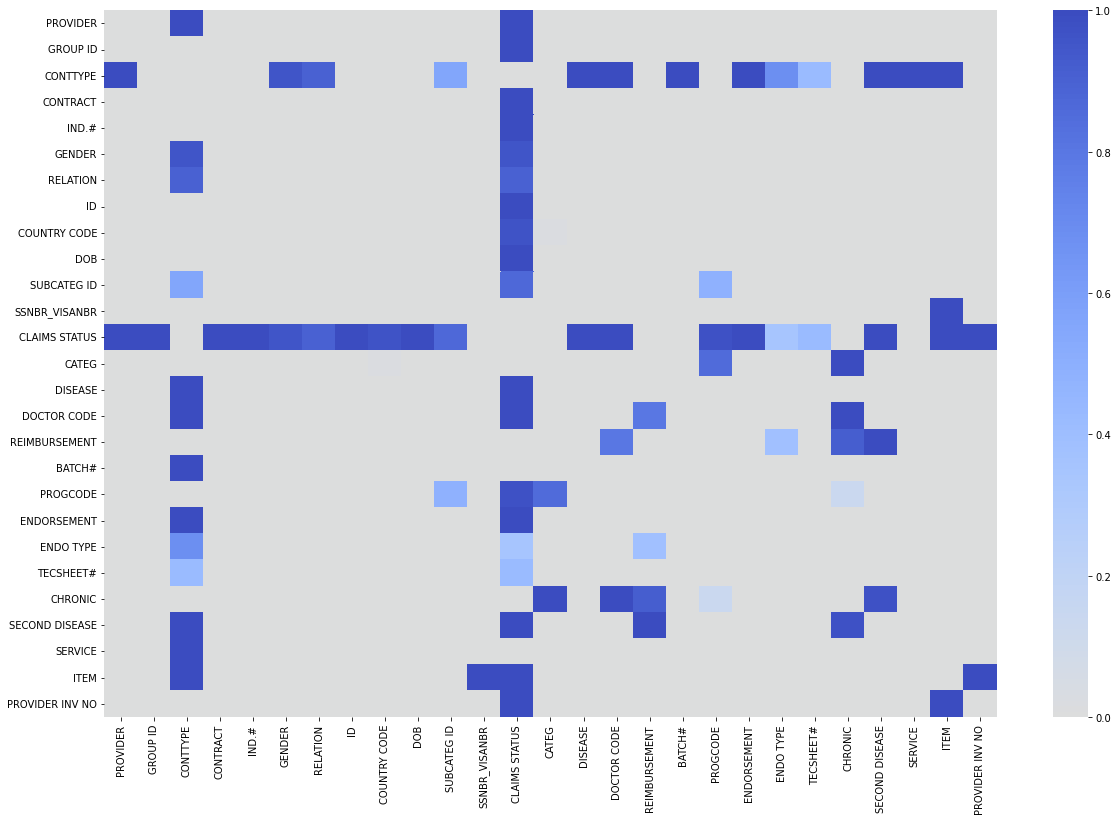

In [16]:
objects = df.select_dtypes(include='object').columns.values
matrix = pd.DataFrame(index=objects,columns=objects,dtype=float)
for i in objects:
    for j in objects:        
        CrosstabResult = pd.crosstab(index=df[i], columns=df[j])
        matrix.loc[i,j] = chi2_contingency(CrosstabResult)[1]

plt.subplots(figsize=(20,13))
sns.heatmap(matrix.astype(float), cmap="coolwarm_r", vmin = 0, vmax=1, center=0)
plt.show()

# Pearson correlation

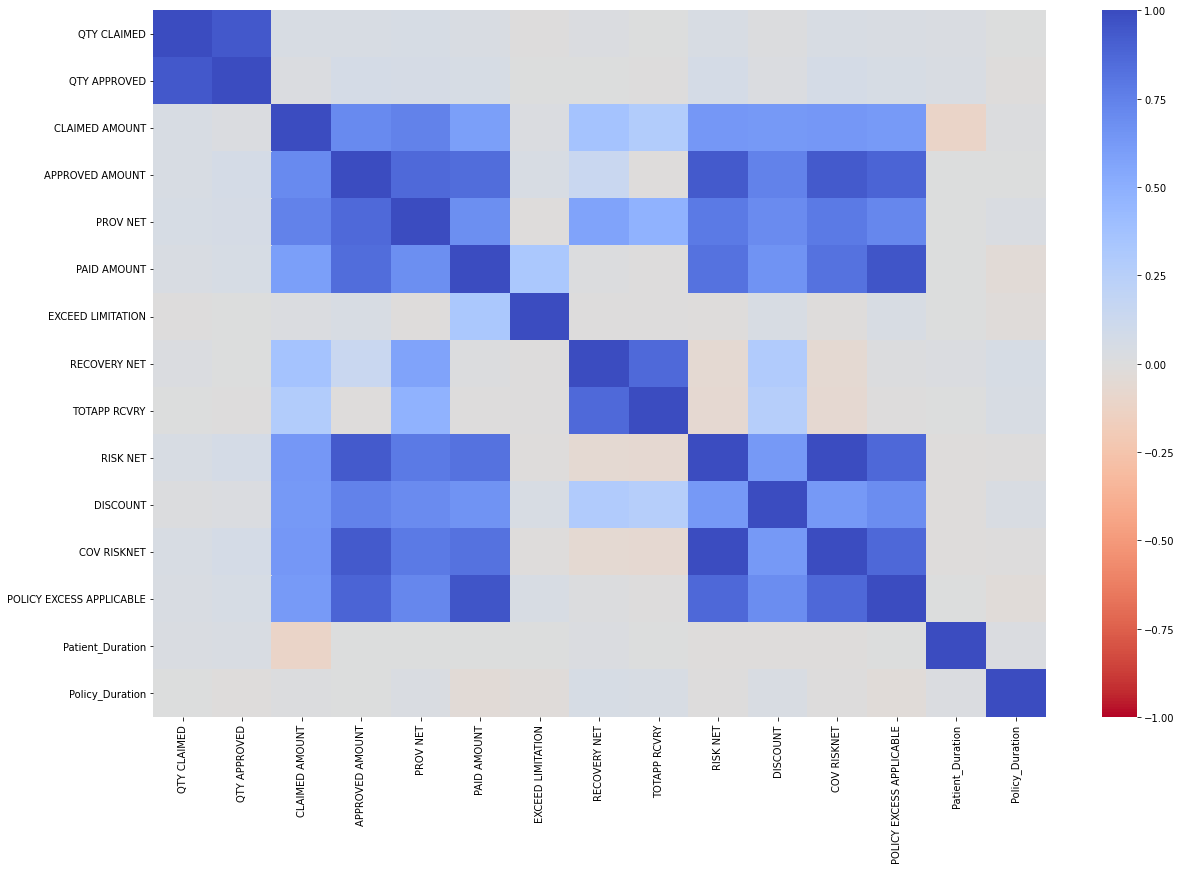

In [17]:
corr = df.select_dtypes(include=[np.float64,np.int64]).corr()

plt.subplots(figsize=(20,13))
sns.heatmap(corr, cmap="coolwarm_r", vmin = -1, vmax=1, center=0)
plt.show()

In [18]:
Second = df["SECOND DISEASE"].apply(lambda x : re.sub(r"\s+","",str(x))).str.get_dummies(sep="-").drop(columns="nan").add_suffix('_2nd')
Second

,A01.4_2nd,A06.9_2nd,A08.0_2nd,A08.3_2nd,A09_2nd,A37.9_2nd,A41.9_2nd,A49.9_2nd,A77.8_2nd,A77.9_2nd,...,Z48.8_2nd,Z48.9_2nd,Z76.0_2nd,Z83.3_2nd,Z86.3_2nd,Z87.4_2nd,Z90.4_2nd,Z91.0_2nd,Z95.5_2nd,Z98.8_2nd
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df = df.drop(columns=["SECOND DISEASE"])

In [20]:
first = pd.get_dummies(df["DISEASE"]).add_suffix('_1st')
first

,A01.0_1st,A01.4_1st,A08.0_1st,A09_1st,A38_1st,A77.8_1st,A77.9_1st,A78_1st,A96.2_1st,B00.0_1st,...,Z33_1st,Z34.8_1st,Z34.9_1st,Z36.9_1st,Z39.2_1st,Z46.6_1st,Z48.0_1st,Z83.3_1st,Z96.6_1st,Z98.8_1st
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
def HandelDate(column,suffix):
    res = pd.DataFrame()
    res["Year"] = column.dt.year
    res["Month"] = column.dt.month
    res["DayOfMonth"] = column.dt.day
    res["DayOfYear"] = column.dt.dayofyear
    res["DayOfWeek"] = column.dt.weekday
    res["IsWeekend"] = (column.dt.weekday >= 5)
    return res.astype(np.int64).add_suffix(suffix)

In [22]:
dates = pd.concat([HandelDate(val,f"_{name.split()[0]}") for name,val in df.select_dtypes(include=[np.datetime64]).iteritems()], axis=1)

In [23]:
df = df.drop(columns=df.select_dtypes(include=[np.datetime64]).columns.values)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19665 entries, 0 to 19774
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PROVIDER                  19665 non-null  object 
 1   GROUP ID                  19665 non-null  object 
 2   CONTTYPE                  19665 non-null  object 
 3   CONTRACT                  19665 non-null  object 
 4   IND.#                     19665 non-null  object 
 5   GENDER                    19665 non-null  object 
 6   RELATION                  19665 non-null  object 
 7   ID                        19621 non-null  object 
 8   COUNTRY CODE              19665 non-null  object 
 9   DOB                       19665 non-null  object 
 10  SUBCATEG ID               19665 non-null  object 
 11  SSNBR_VISANBR             19665 non-null  object 
 12  CLAIMS STATUS             19665 non-null  object 
 13  CATEG                     19665 non-null  object 
 14  DISEAS

In [25]:
new_df = pd.concat([df,dates,Second],axis=1)
new_df.head()
#df.to_excel("hh.xlsx",index=False)

,PROVIDER,GROUP ID,CONTTYPE,CONTRACT,IND.#,GENDER,RELATION,ID,COUNTRY CODE,DOB,...,Z48.8_2nd,Z48.9_2nd,Z76.0_2nd,Z83.3_2nd,Z86.3_2nd,Z87.4_2nd,Z90.4_2nd,Z91.0_2nd,Z95.5_2nd,Z98.8_2nd
0,C3013,880.0,GROUP,8014116,8187304,Female,SPOUSE,284010365660,965,1984,...,0,0,0,0,0,0,0,0,0,0
1,C3013,880.0,GROUP,8014116,8187304,Female,SPOUSE,284010365660,965,1984,...,0,0,0,0,0,0,0,0,0,0
2,C3013,880.0,GROUP,8014116,8187304,Female,SPOUSE,284010365660,965,1984,...,0,0,0,0,0,0,0,0,0,0
3,C3013,880.0,GROUP,8014116,8187304,Female,SPOUSE,284010365660,965,1984,...,0,0,0,0,0,0,0,0,0,0
4,C3013,880.0,GROUP,8014116,8187304,Female,SPOUSE,284010365660,965,1984,...,0,0,0,0,0,0,0,0,0,0


# 

In [26]:
y = (df['CLAIMED AMOUNT'].values == df['PAID AMOUNT'].values).astype(np.int64)
X = new_df.select_dtypes(include=[np.int64,np.float64]).fillna(0).values

# class imbalance checking

c:\Users\MEAPAL 4\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


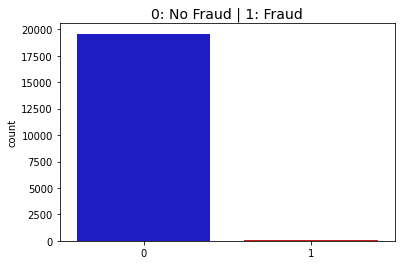

In [27]:
sns.countplot(y, palette=["#0101DF", "#DF0101"])
plt.title('0: No Fraud | 1: Fraud', fontsize=14)
plt.show()

# minor class upsampling 

In [28]:
oversample = SMOTE()
X_sampled, y_sampled = oversample.fit_resample(X, y)

c:\Users\MEAPAL 4\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


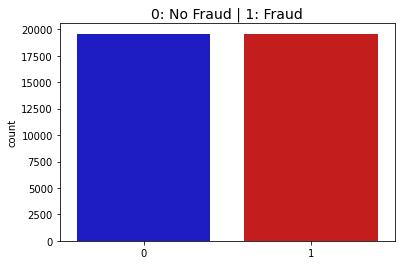

In [29]:
sns.countplot(y_sampled, palette=["#0101DF", "#DF0101"])
plt.title('0: No Fraud | 1: Fraud', fontsize=14)
plt.show()

In [30]:
y_sampled.shape

(39172,)

# Train-Test split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled,test_size = 0.2, random_state = 45)#, stratify=y)

In [32]:
X_train.shape

(31337, 597)

# Feature Scaling

In [33]:
rob_scaler = RobustScaler()
x_train_scaled = rob_scaler.fit_transform(X_train)
x_test_scaled = rob_scaler.transform(X_test)

# Feature Selection and Dimensionality Reduction

In [34]:
pca = PCA(random_state=42)
x_train_reduced = pca.fit_transform(x_train_scaled)
x_test_reduced = pca.transform(x_test_scaled)
print(pca.explained_variance_ratio_.round(2))

[0.5  0.37 0.06 0.03 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0. 

* 87% of variance is explained by the first two components, so we are going to select them.

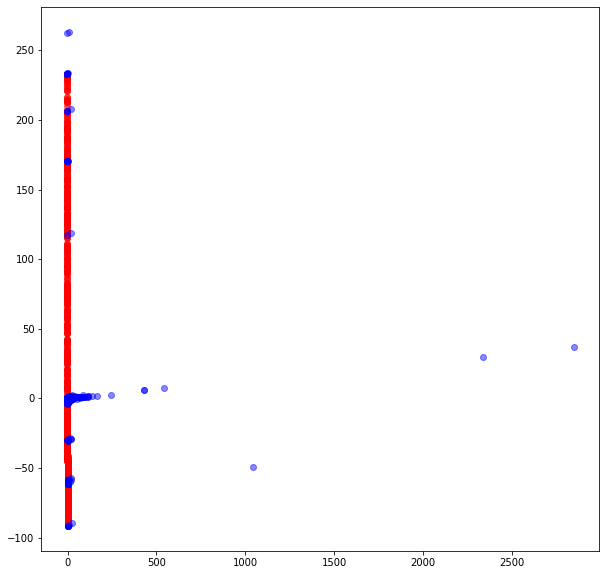

In [35]:
plt.figure(figsize=(10,10)) 
plt.scatter(x_train_reduced[:,0][y_train.astype(bool)],x_train_reduced[:,1][y_train.astype(bool)],color='#ff000077')
plt.scatter(x_train_reduced[:,0][~y_train.astype(bool)],x_train_reduced[:,1][~y_train.astype(bool)],color='#0000ff77')
plt.show()

# 1 - Classification Algorithm

In [36]:
RFC = RandomForestClassifier(random_state=2540)

RFC.fit(x_train_reduced[:,:2], y_train)

y_pred_train = RFC.predict(x_train_reduced[:,:2])
y_pred_test = RFC.predict(x_test_reduced[:,:2])

In [37]:
print(f"Accuracy score on Training set: {accuracy_score(y_train, y_pred_train) * 100:.2f}%")
print(f"Accuracy score on Testing set: {accuracy_score(y_test, y_pred_test) * 100:.2f}%")
print(f"F-beta score on Training set: {f1_score(y_train, y_pred_train) * 100:.2f}%")
print(f"F-beta score on Testing set: {f1_score(y_test, y_pred_test) * 100:.2f}%")

Accuracy score on Training set: 100.00%
Accuracy score on Testing set: 95.04%
F-beta score on Training set: 100.00%
F-beta score on Testing set: 95.11%


# 2 - Anomaly Detection

we are going to use DBSCAN for outliers detection because it's a density-based unsupervised clustering algorithm

In [38]:
dbscan = DBSCAN(eps=2.5, min_samples=2)
clusters = dbscan.fit(x_train_reduced)
labels = (clusters.labels_ != -1)

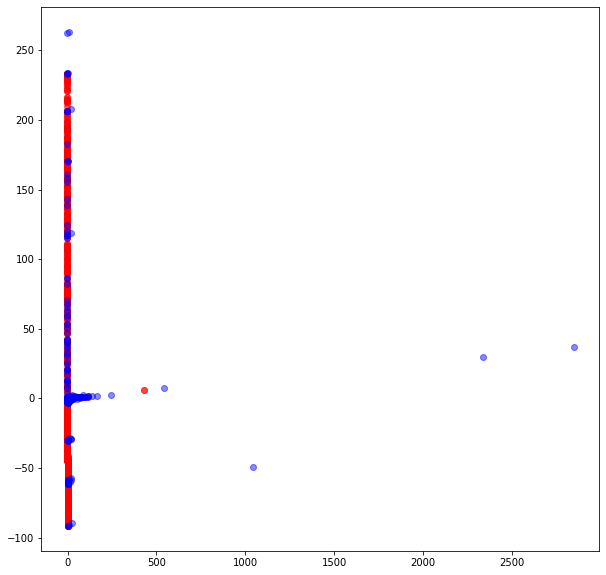

In [39]:
plt.figure(figsize=(10,10)) 
plt.scatter(x_train_reduced[:,0][labels.astype(bool)],x_train_reduced[:,1][labels.astype(bool)],color='#ff000077')
plt.scatter(x_train_reduced[:,0][~labels.astype(bool)],x_train_reduced[:,1][~labels.astype(bool)],color='#0000ff77')
plt.show()

* by comparing to the earlier figure we can notice that DBSCAN is almost able to catch outliers correctly